あるストリーミングサービスの解約率を調べるという状況を想定する  
まずはデータ生成を行う  

ここで解約率を推定するために利用できるデータは以下のものとする。

| 項目 | 説明 | 分布 |
| --- | --- | --- |
| DaysSinceLastActivity | 最終ログインからの日数 | 指数分布: 平均3日 |
| HasActivePromotionalOffer | 復帰を促したか | 二項分布: 0 or 1 |
| AverageSessionDuration | 平均セッション時間 | ガンマ分布: (2,15) 平均30分 |

In [8]:
using Random

Random.seed!(1234)
n_samples = 1000

1000

10-element Vector{Float64}:
  7.979611744641572
 21.94314974976224
 23.057601766391116
  0.6436436167365401
 19.705345663177877
 29.72295859437289
 89.38767091215328
  6.277319776507974
 20.114260785796994
 33.330453133353245

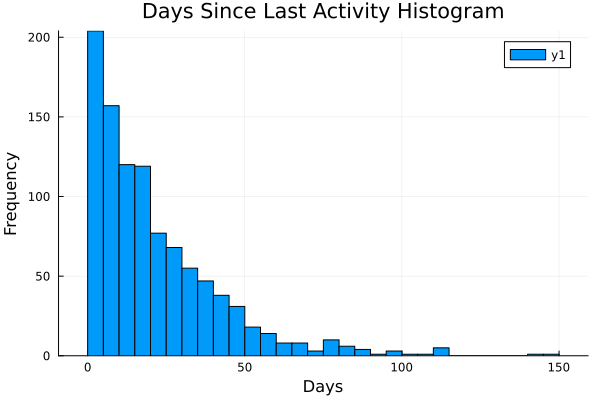

In [9]:
using Distributions
using StatsPlots

DaysSinceLastActivity = rand(Exponential(20), n_samples)
display(first(DaysSinceLastActivity, 10))

histogram(
    DaysSinceLastActivity,
    bins=30,
    title="Days Since Last Activity Histogram",
    xlabel="Days",
    ylabel="Frequency"
)

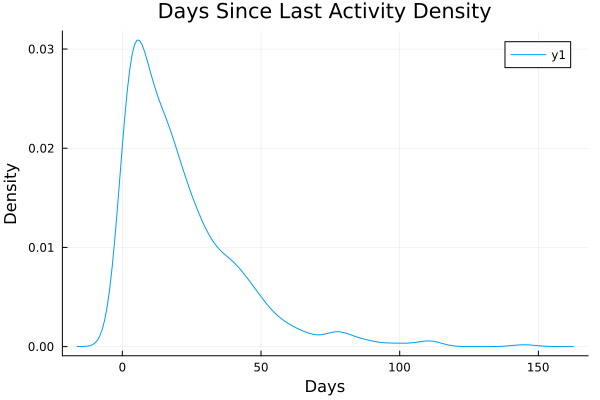

In [10]:
# density plot
density(
    DaysSinceLastActivity,
    title="Days Since Last Activity Density",
    xlabel="Days",
    ylabel="Density",
)

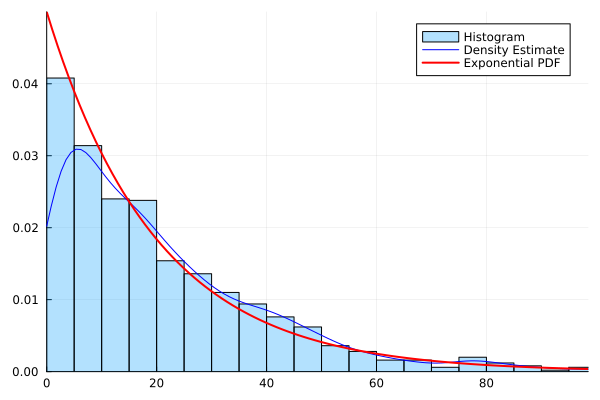

In [11]:
# Combined Histogram and Density plot on the same plot
combined_plot = histogram(
    DaysSinceLastActivity,
    bins=30,
    normalize=true,   # Crucial for density plot
    fillalpha = 0.3,
    linecolor = :black,
    label = "Histogram",
    xlims = (0, quantile(DaysSinceLastActivity, 0.99))
)
density!(
    DaysSinceLastActivity,
    fillalpha = 0.6,
    linecolor = :blue,
    label = "Density Estimate",
)
# Overlay the theoretical distribution
x = range(0, quantile(DaysSinceLastActivity, 0.99), length=100)
plot!(
    x,
    pdf(Exponential(20), x),
    linewidth=2,
    color=:red,
    label="Exponential PDF"
)

display(combined_plot)


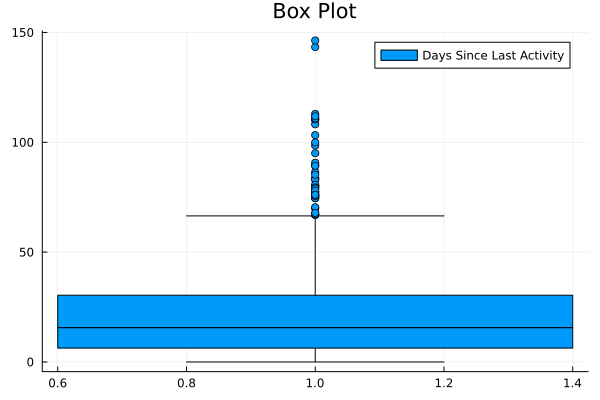

In [15]:
boxplot(
    DaysSinceLastActivity,
    label="Days Since Last Activity",
    title="Box Plot"
)

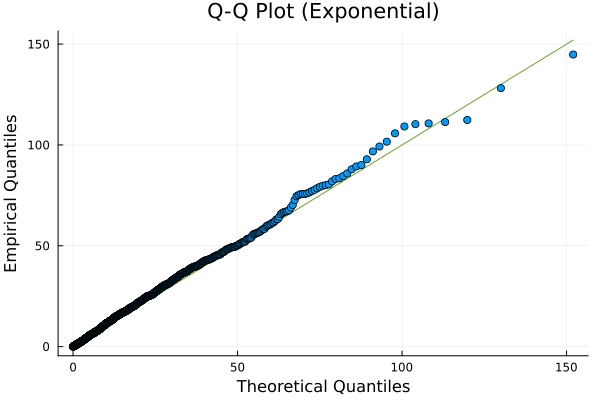

In [21]:
qqplot(
    Exponential(20),
    DaysSinceLastActivity,
    label="Q-Q Plot",
    title="Q-Q Plot (Exponential)",
    xlabel="Theoretical Quantiles",
    ylabel="Empirical Quantiles"
)

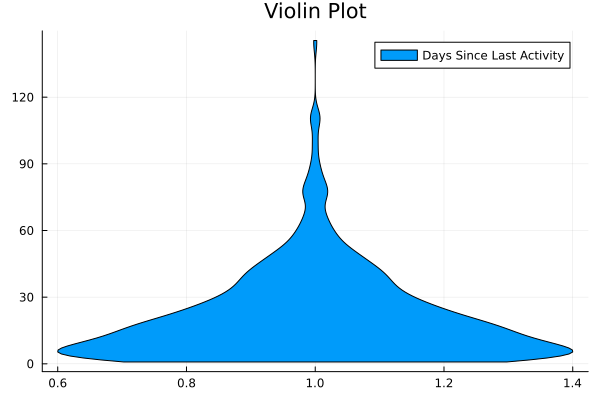

In [18]:
violin(
    DaysSinceLastActivity,
    label="Days Since Last Activity",
    title="Violin Plot"
)